# Python Assignment 
## Qi Mu

Install BioPhython first in the environment, so the code would work

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

### Functions

#### 1. Dr. X: this gets sequences

In [2]:
def get_sequences_from_file(fasta_fn):    # define a function 'get_sequences_from_file', and 'fasta_fn' is file name.
    sequence_data_dict = {}    # create an empty dictionary called 'sequence_data_dict', so we can put sequences(value) by species_name (key) in it later.  
    for record in SeqIO.parse(fasta_fn, "fasta"):    # start a for loop, parse element based on "fasta" format in the "fasta_fn" file, each element is called "record"
        description = record.description.split()    # create a variable named "description", which is the description part of the each record, and split by space.
        species_name = description[1] + " " + description[2]    # create a variable names "species_name", which took the second and third strings of description and connected by space.
        sequence_data_dict[species_name] = record.seq    # in the empty dictionary we created earlier, create key as species_name, and value is sequence part of each record.
    return(sequence_data_dict)    # return sequence_data_dict, which is the all the species_names (keys) and their values (sequences).


#### 2. String translation function

In [3]:
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]    # BioPython returns <Bio.Data.CodonTable.NCBICodonTableDNA at 0x24d963d1e80>
    aa_seq_string = ''
    for i in range(len(string_nucleotides))[::3]:    # for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
        codon = string_nucleotides[i:i+3]    # codon is position i to i+3
        if codon == 'TAG' or codon == 'TAA' or codon == 'TGA':    # if the sequence has a stop codon at the end, break. Stop codon: TAG, TAA, TGA.
            break
        aa = mito_table.forward_table[codon]    # translate codon to amino-acid
        aa_seq_string = aa_seq_string + aa    # add the aa to aa_seq_string aa_seq_string.append(aa)
    return (aa_seq_string)

#### 3. Alternative way to write translation function using Biopython

In [4]:
from Bio.Seq import Seq    # http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc25
from Bio.Alphabet import IUPAC
def translate_biopython(string_nucleotides):    # define a function called "translate_biophython" that can translate "string_nucleotides" DNA into amino-acids
    coding_dna = Seq(string_nucleotides)    # The input sequence for translation has to be in Seq()
    aa = coding_dna.translate(to_stop=True)    # Use translate() method from Biopython to translate, and store the translated sequence into "aa". "to_stop = Ture" means stop translate at stop codon.
    return(aa)

#### 4. Count aa analysis function

In [5]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis    # http://biopython.org/wiki/ProtParam
def compute_molecular_weight(aa_seq):    # define a function that can calculate molecular weight of amino-acid
    analysed_seq = ProteinAnalysis(aa_seq)    # The ProteinAnalysis class takes one argument, the protein sequence as a string and builds a sequence object using the Bio.Seq module
    return(analysed_seq.molecular_weight())    # Return molecular weight

#### 5. GC content analysis function

In [6]:
def compute_GC_content(DNA_seq):    # define a function called 'compute_GC_content', DNA_seq is the file name
    count = 0    # start count as 0
    for base in DNA_seq:    # using for loop to count 'G' and 'C' in DNA_seq
        if base == 'G' or base == 'C':    # if base is 'G' or 'C', the count increments
            count += 1
    return(count/len(DNA_seq))    # return the percentage of count

### Main

In [7]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 
# use the "get_sequences_from_file" function we define to get sequences from "bears_cytb.fasta", store in "cytb_seqs"

In [8]:
bears_df = pd.read_csv("bears_mass.csv")    # Read in the "bears_mass.csv" as dataframe bears_df. Includes only data for body mass. 
species_list = list(bears_df.species)    # make a list of species, by extracting "species" from bears_df.

In [9]:
bears_df    # Check the dataframe

,species,mass
0,Ursus spelaeus,550.800
1,Ursus arctos,203.500
2,Ursus thibetanus,99.714
3,Melursus ursinus,100.030
4,Ursus americanus,110.560
5,Helarctos malayanus,47.020
6,Ailuropoda melanoleuca,118.200
7,Tremarctos ornatus,140.700
8,Ursus maritimus,425.100


In [10]:
species_list    # Check the species_list

['Ursus spelaeus',
 'Ursus arctos',
 'Ursus thibetanus',
 'Melursus ursinus',
 'Ursus americanus',
 'Helarctos malayanus',
 'Ailuropoda melanoleuca',
 'Tremarctos ornatus',
 'Ursus maritimus']

In [11]:
cytb_seqs    # Check the sequences for each species

{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA', SingleLetterAlphabet()),
 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA', SingleLetterAlphabet()),
 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA', SingleLetterAlphabet()),
 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...A

#### 6. Add two new columns to the bears DataFrame: (1) molecular weight and (2) GC content.
*Set the value to 'NaN' to indicate that these cells are currently empty.*

In [12]:
bears_df['molecular_weight'] = 'NaN'    # Create a new column named 'molecular_weight' with value 'NaN'

In [13]:
bears_df['GC_content'] = 'NaN'    # Create a new column named 'GC_content' with value 'NaN'

In [14]:
bears_df    # Check the new table with two additional column and the values are set as 'NaN' currently.

,species,mass,molecular_weight,GC_content
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN


#### 7. Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to DataFrame.

In [15]:
# Method 1
mw_aa_list = []    # Creat an empty list to store molecular weight generated from the for-loop below
GC_dna_list = []    # Creat an empty list to store GC content generated from the for-loop below
for species, seq in cytb_seqs.items():    # Start to loop though the items in cytb_seqs, with species as key and seq as value
    aa_seq = translate_function(str(seq))    # First convert the seq to string, and use the translate function to translate to amono acid sequencces, stored in aa_seq 
    mw_aa = compute_molecular_weight(aa_seq)    # Calculate the molecular weight with the fucntion of the amino acid sequences
    mw_aa_list.append(mw_aa)    # Append all the mw_aa value from each loop into the list we just created
    GC_dna = compute_GC_content(str(seq))    # Calculate the GC content for seq strings
    GC_dna_list.append(GC_dna)    # Append all the GC_dna value from each loop into the other list we just created

bears_df['molecular_weight'] = mw_aa_list   # Put the list data into the new columns
bears_df['GC_content'] = GC_dna_list

In [16]:
# Method 2
i = 0    # Set an variable i with value zero
for species, seq in cytb_seqs.items():     # Start to loop though the items in cytb_seqs, with species as key and seq as value
    aa_seq = translate_function(str(seq))    # First convert the seq to string, and use the translate function to translate to amono acid sequencces, stored in aa_seq 
    mw_aa = compute_molecular_weight(aa_seq)    # Calculate the molecular weight with the fucntion of the amino acid sequences
    GC_dna = compute_GC_content(str(seq))    # Calculate the GC content for seq strings
    bears_df.loc[i,'molecular_weight'] = mw_aa    # Use loc method to assign the value from each loop to corresponding position in the form, based on the row label i
    bears_df.loc[i,'GC_content'] = GC_dna
    i += 1    # Row label goes up 1 for each loop

In [17]:
bears_df    # Check if the data are correctly put into the dataframe

,species,mass,molecular_weight,GC_content
0,Ursus spelaeus,550.800,3207.7007,0.437719
1,Ursus arctos,203.500,3173.6845,0.437719
2,Ursus thibetanus,99.714,3143.6585,0.456140
3,Melursus ursinus,100.030,3143.6585,0.451754
4,Ursus americanus,110.560,3173.6845,0.439474
5,Helarctos malayanus,47.020,3143.6585,0.442982
6,Ailuropoda melanoleuca,118.200,3277.8335,0.407895
7,Tremarctos ornatus,140.700,3180.6754,0.443860
8,Ursus maritimus,425.100,3207.7007,0.442982


### Figures

#### 8. Plot a bar-chart of the mass with the x-axes labeled with species names.  
*Q1* What is the largest bear species?   
*Q2* What else is interesting about this species?  

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
%matplotlib inline

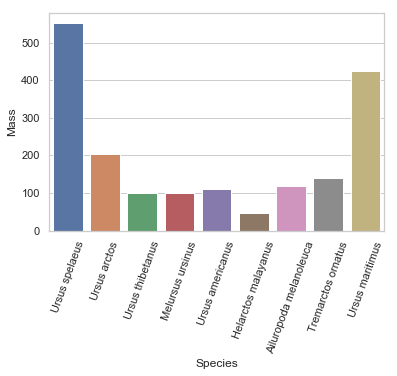

In [20]:
sns.set(style="whitegrid")    # Set style of the figure
Mass = sns.barplot(x="species", y="mass", data=bears_df)    # Draw a bar plot and stored in Mass
Mass.set(xlabel = 'Species', ylabel = 'Mass')    # Set the axes names
for species in Mass.get_xticklabels():    # To rotate the x-axis label, so that they are not overlapping with each other
    species.set_rotation(70)    # A loop has to use to go through all the elment in the x-axis

*Q1*: Ursus spelaeus is the largest bear species according to the graph.  
*Q2*: This species of bear was extinct about 24,000 years ago. 

#### 9. Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

C:\Users\qmu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


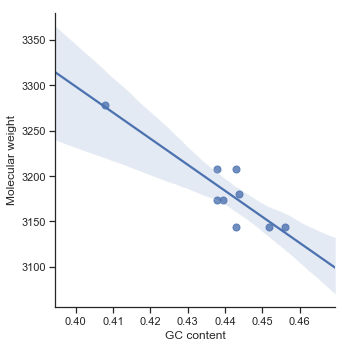

In [21]:
# Method 1
sns.set(style="ticks")    # Set style of the figure
GC_MW = sns.lmplot(x="GC_content", y="molecular_weight", data=bears_df, scatter_kws={"s": 50})    # Draw a linear regression plot and stored in GC_MW, the size for the points are 50
GC_MW.set(xlabel = 'GC content', ylabel = 'Molecular weight')    # Set the axes labels

#### 10. Save the new DataFrame to a file called "bears_mass_cytb.csv"

In [22]:
# Use "to_csv" to output as csv file. This is comma seperated, with a specific encoding (e.g. 'utf-8'), and no index in the final table.
bears_df.to_csv("bears_mass_cytb.csv", encoding='utf-8', index=False)

#### 11. Draw a different plot on this data set

C:\Users\qmu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


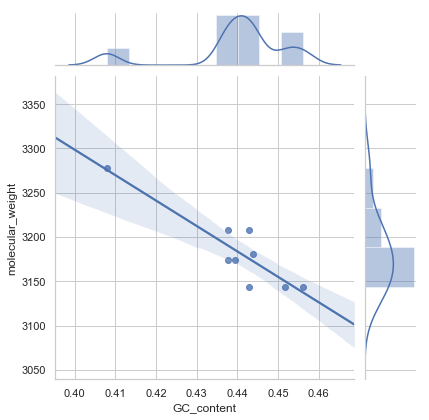

In [23]:
sns.set(style="whitegrid")    # Set style of the figure
GC_MW = sns.jointplot(x="GC_content", y="molecular_weight", data=bears_df, kind="reg")  # Draw joint plot and stored in GC_MW, with a regression line
# This plot is similar to #9, however, new features are added, so that we can see the histgram of x and y as well as the regression.